# <center><span style="color:red; font-weight:bold;">PredictiveBankChurn: Automated Customer Attrition Forecasting with H2O AutoML</span></center>


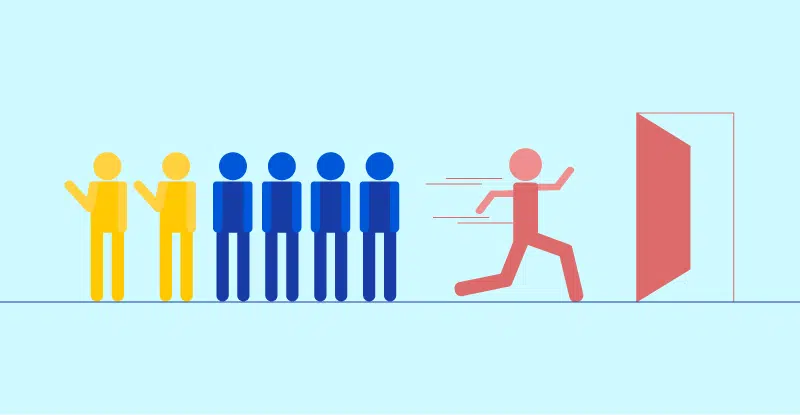

# Project Overview:

## Context:
Churn, a measure of customer inactivity or disengagement over time, is evident through various data facets such as the recency of account actions or shifts in the account balance.

## Aim:
This study seeks to achieve the following objectives:

- **Identify and Visualize Factors Influencing Customer Churn:**
  Explore and visually represent the factors contributing to customer churn.

- **Build a Predictive Model:**
  Develop a predictive model with the following goals:

  - Classify customers into churn or non-churn categories.
  - Ideally, select a model that assigns a probability to churn, facilitating targeted customer service efforts.

## Approach:
Utilizing Artificial Neural Network (ANN) models and H2O AutoML, we aim to leverage advanced techniques for accurate predictions.

## Project Timeline:
1. **Data Analysis:**
   Thoroughly analyze the dataset to gain insights into the underlying patterns and characteristics.

2. **Feature Engineering:**
   Enhance the dataset by extracting meaningful features to improve model performance.

3. **ANN Model Building:**
   Develop and train Artificial Neural Network models to classify customer churn.

4. **H2O AutoML Model Building and Prediction:**
   Employ H2O AutoML for comprehensive model exploration and prediction, considering its automation capabilities.

This structured approach ensures a systematic progression from data exploration to advanced model building, providing valuable insights into customer churn dynamics.


## **1. Importing Libraries:**

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore") 

## **2. Data Ingestion:**

In [2]:
df = pd.read_csv("D:\Bank+Customer+Churn-Auto+Keras+-Project+code+and+Files\Project code and Files\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **3. Exploratory Data Analysis:**

In [4]:
# Get summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
df.describe()


Summary statistics of numerical columns:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

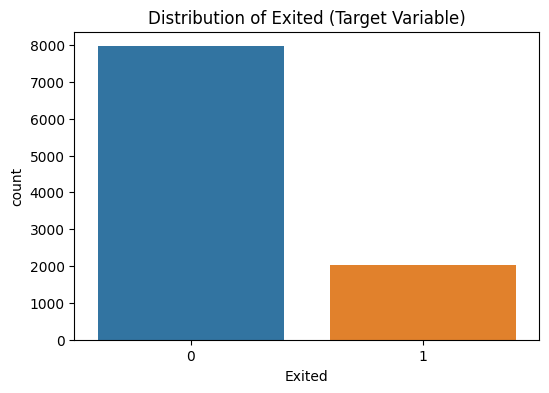

In [8]:
# Visualize the distribution of the target variable ('Exited' column)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited (Target Variable)')
plt.show()

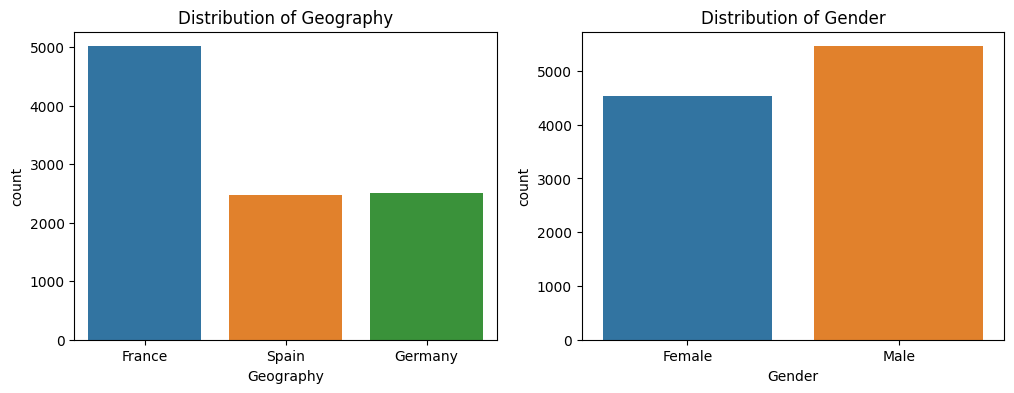

In [10]:
# Visualize the distribution of categorical variables
# Replace 'Geography' and 'Gender' with the actual categorical columns in your dataset
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', data=df)
plt.title('Distribution of Geography')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')

plt.show()

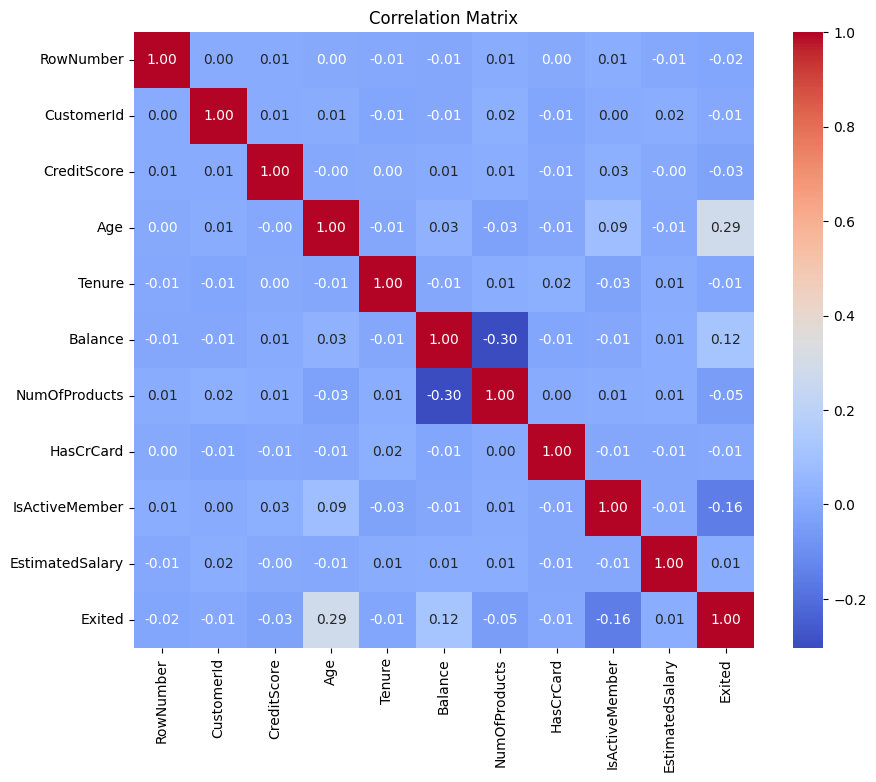

In [13]:
# Visualize the correlation matrix for numerical features
plt.figure(figsize=(10, 8))

# Explicitly select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

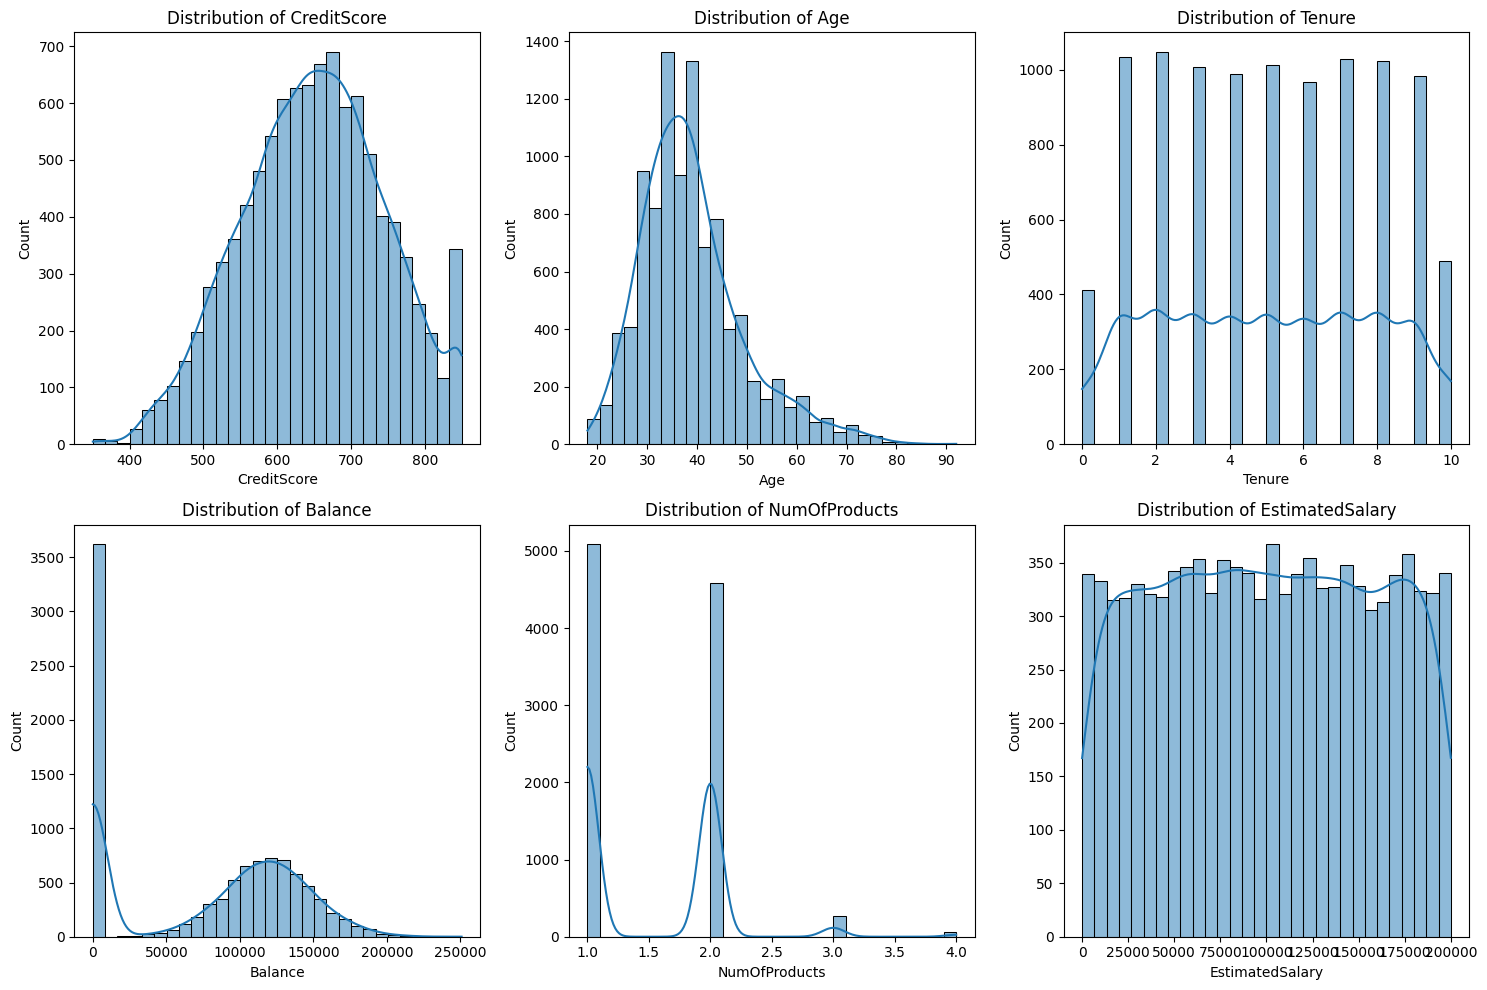

In [14]:
# Explore the distribution of numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

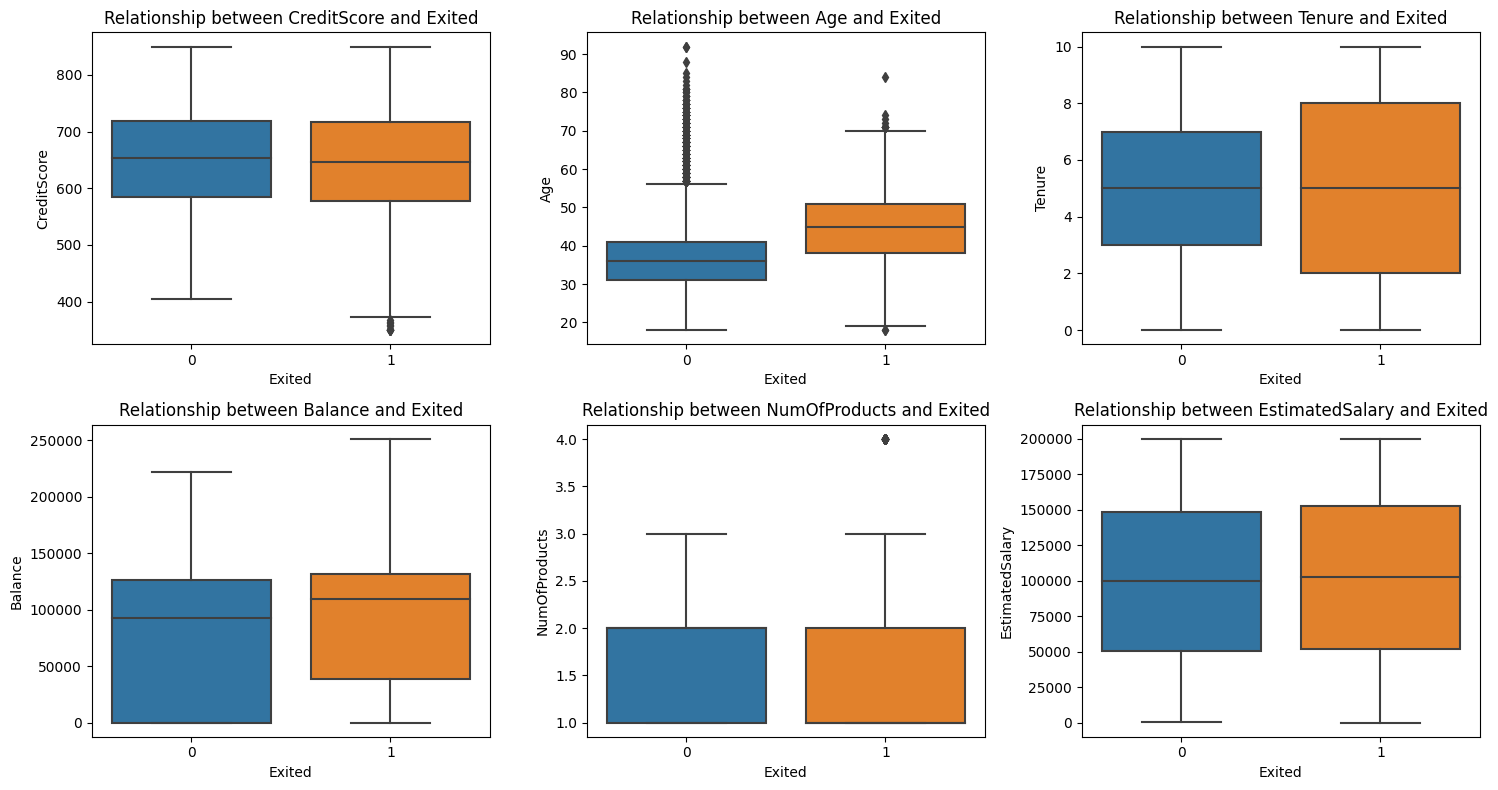

In [15]:
# Explore relationships between numerical features and the target variable
plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'Relationship between {feature} and Exited')

plt.tight_layout()
plt.show()

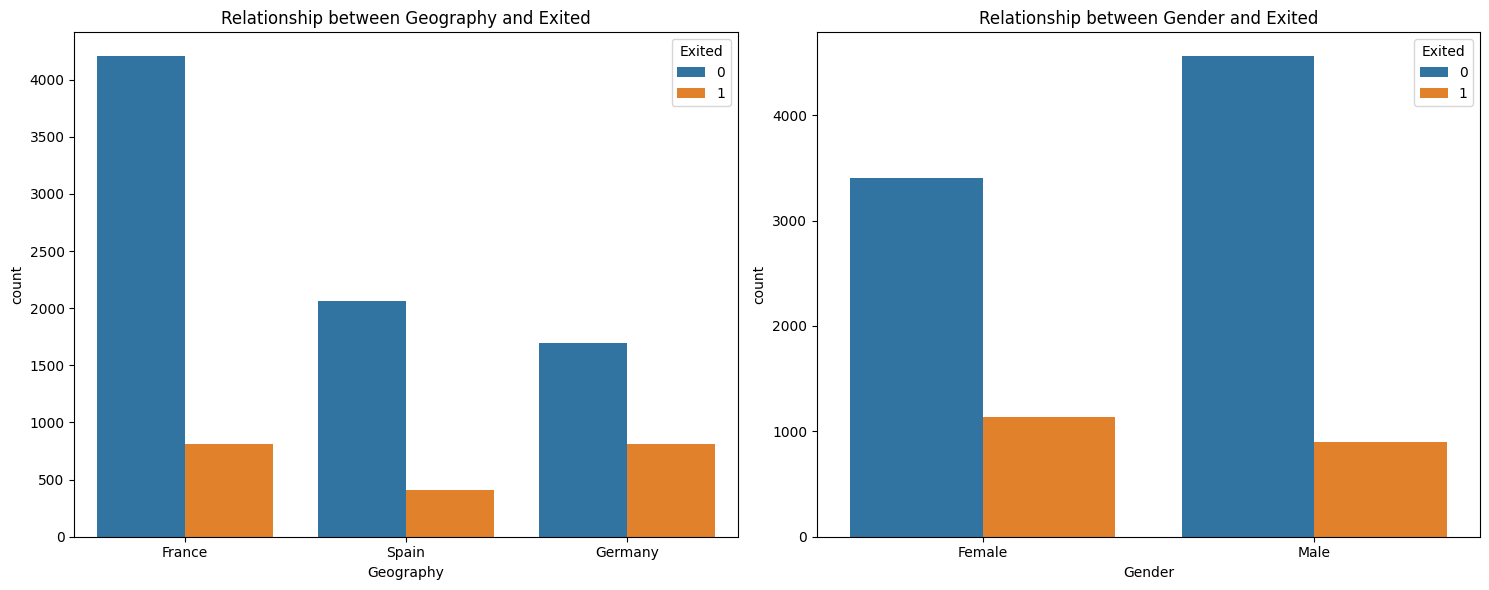

In [16]:
# Explore relationships between categorical features and the target variable
# Replace 'Geography' and 'Gender' with the actual categorical columns in your dataset
cat_features = ['Geography', 'Gender']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Relationship between {feature} and Exited')

plt.tight_layout()
plt.show()

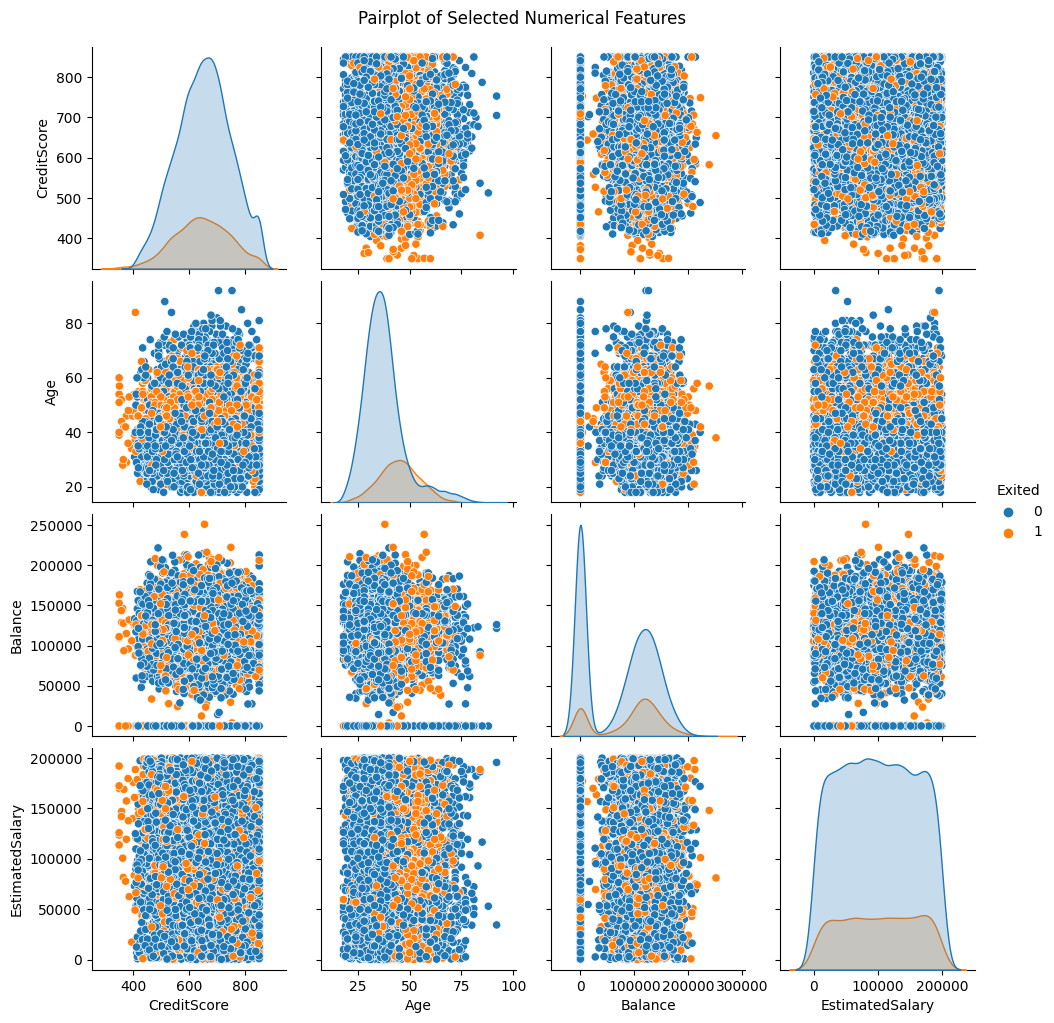

In [20]:
# Pairplot for selected numerical features
selected_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
selected_features.append('Exited')  # Add your actual target variable column name

sns.pairplot(df[selected_features], hue='Exited', diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()

In [21]:
# Correlation heatmap for selected numerical features
selected_corr_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']
selected_corr_matrix = df[selected_corr_features].corr()

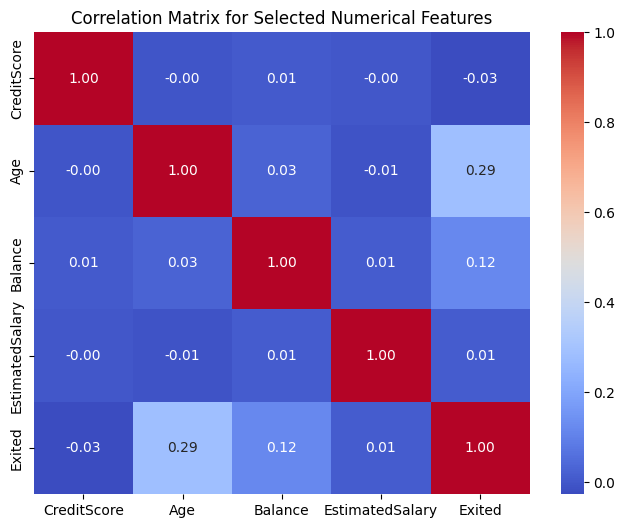

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Numerical Features')
plt.show()

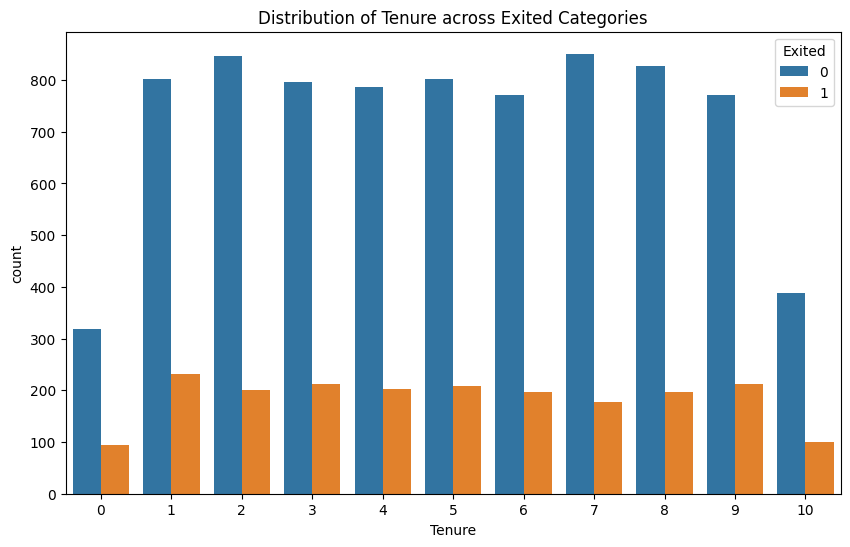

In [23]:
# Explore the distribution of 'Tenure' across 'Exited' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Distribution of Tenure across Exited Categories')
plt.show()

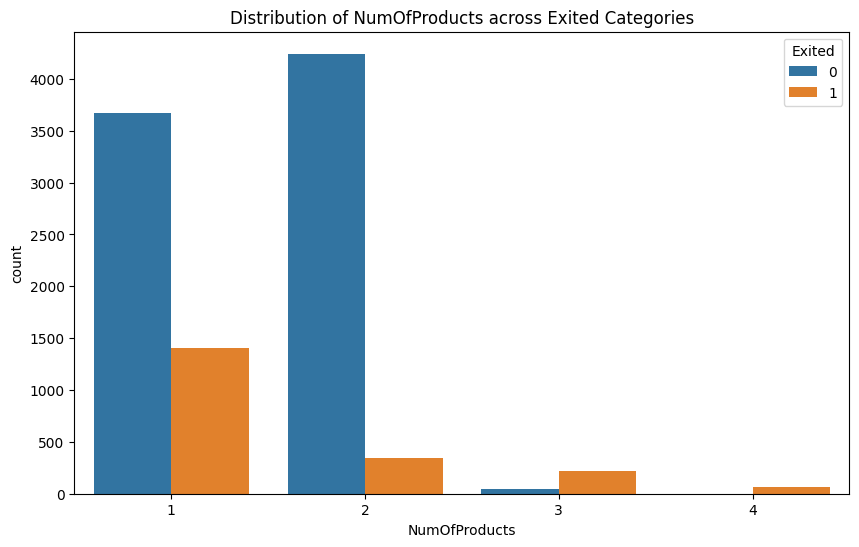

In [24]:
# Explore the distribution of 'NumOfProducts' across 'Exited' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Distribution of NumOfProducts across Exited Categories')
plt.show()

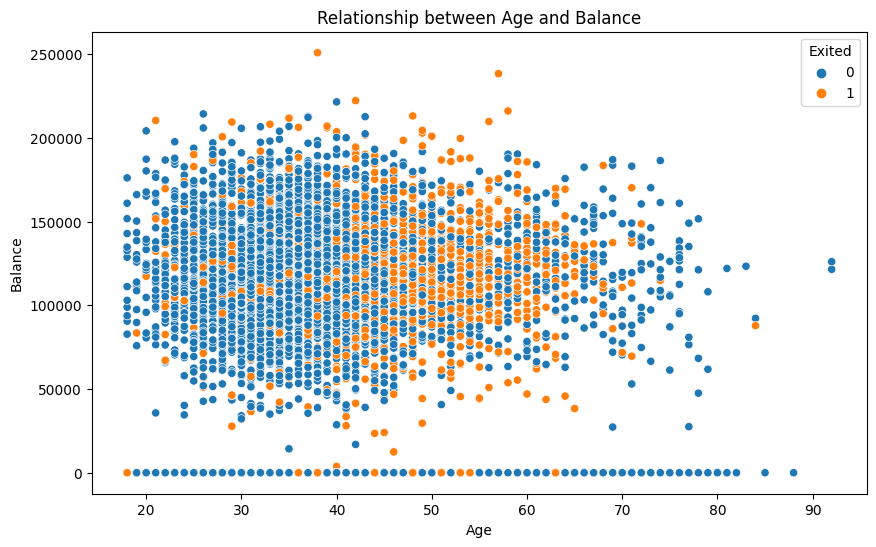

In [25]:
# Explore the relationship between 'Age' and 'Balance'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df)
plt.title('Relationship between Age and Balance')
plt.show()

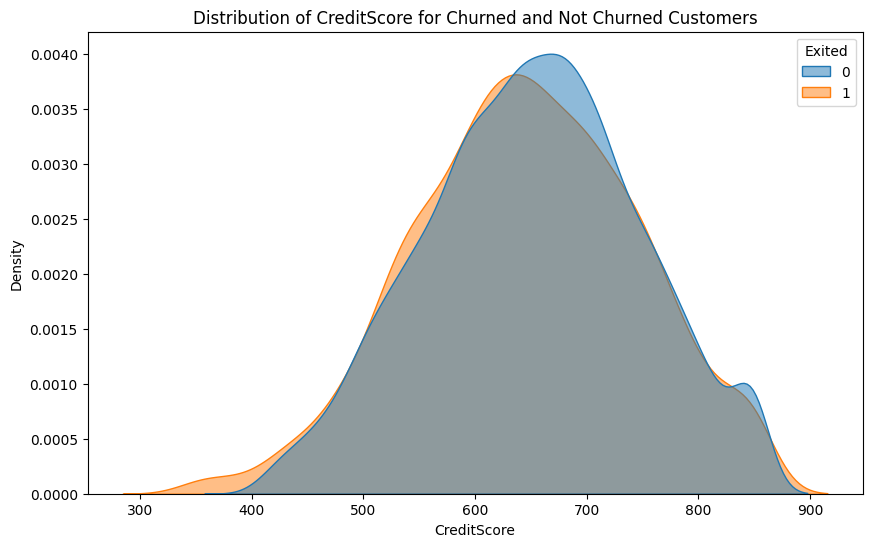

In [27]:
# Explore the distribution of 'CreditScore' for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='CreditScore', hue='Exited', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of CreditScore for Churned and Not Churned Customers')
plt.show()

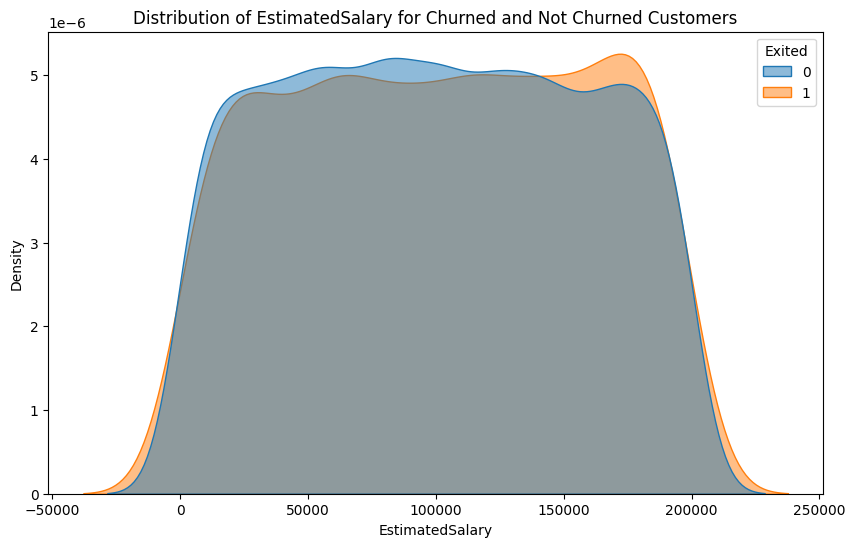

In [28]:
# Explore the distribution of 'EstimatedSalary' for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='EstimatedSalary', hue='Exited', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of EstimatedSalary for Churned and Not Churned Customers')
plt.show()

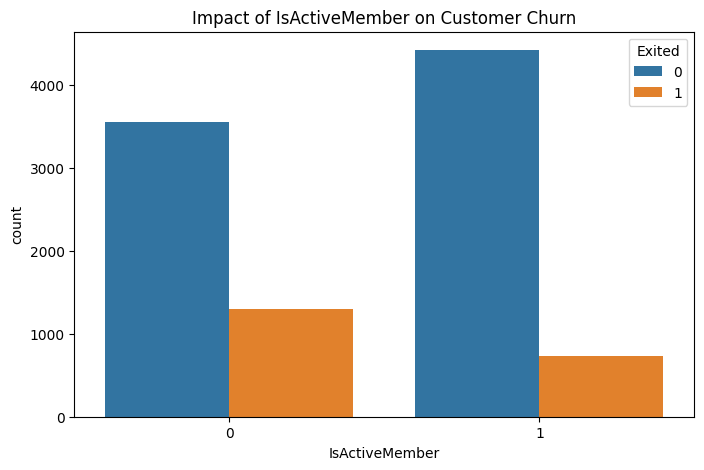

In [29]:
# Explore the impact of 'IsActiveMember' on customer churn
plt.figure(figsize=(8, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Impact of IsActiveMember on Customer Churn')
plt.show()

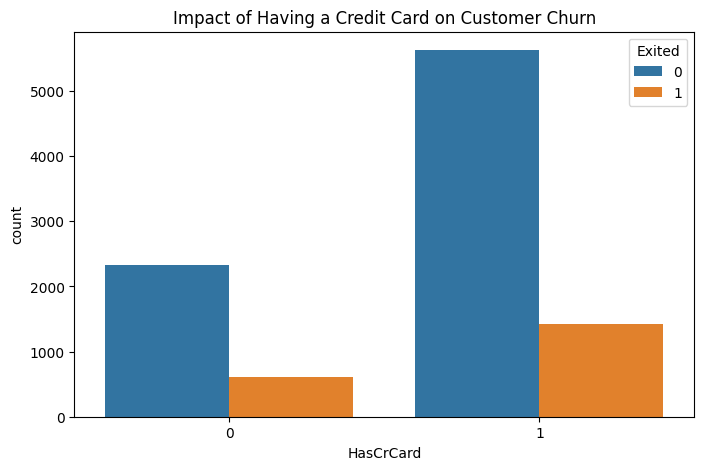

In [30]:
#  Explore the impact of having a credit card on customer churn
plt.figure(figsize=(8, 5))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Impact of Having a Credit Card on Customer Churn')
plt.show()

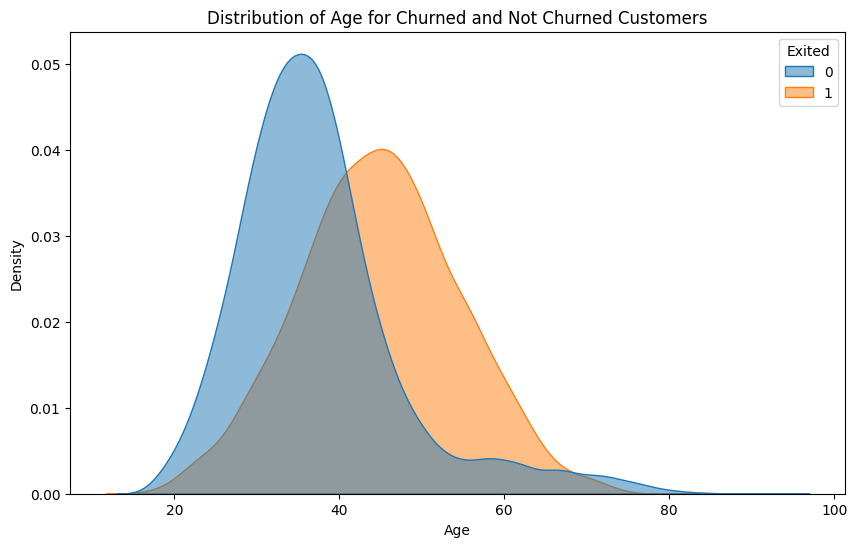

In [31]:
# Explore the distribution of 'Age' for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Exited', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Age for Churned and Not Churned Customers')
plt.show()

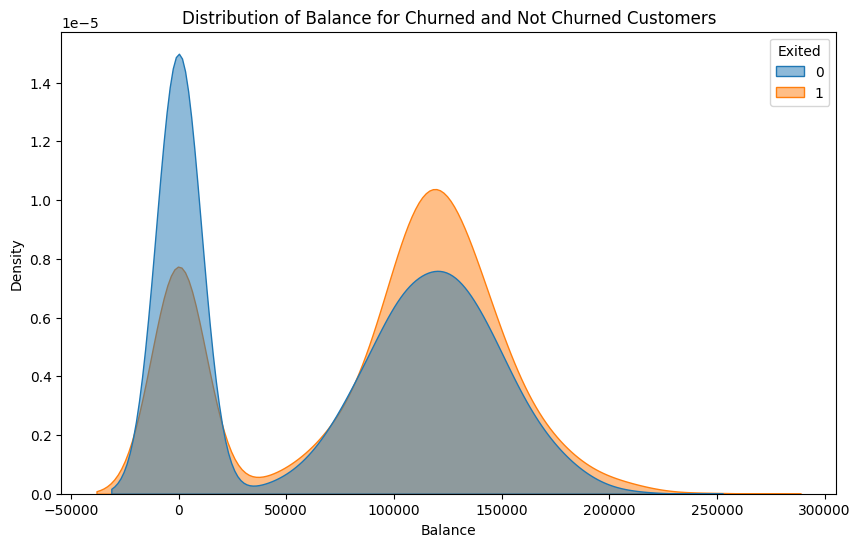

In [32]:
# Explore the distribution of 'Balance' for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Balance', hue='Exited', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Balance for Churned and Not Churned Customers')
plt.show()

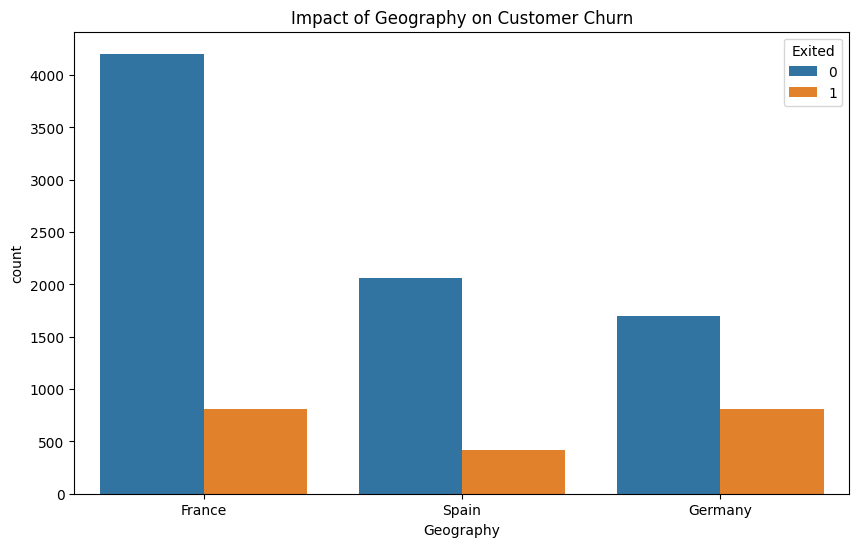

In [33]:
# Explore the impact of 'Geography' on customer churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Impact of Geography on Customer Churn')
plt.show()

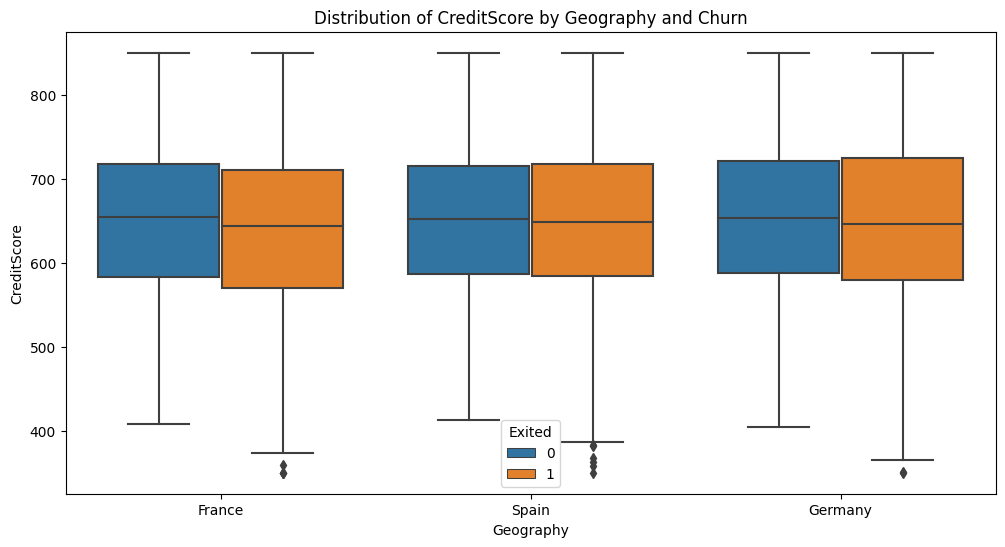

In [34]:
# Explore the distribution of 'CreditScore' by 'Geography'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geography', y='CreditScore', data=df, hue='Exited')
plt.title('Distribution of CreditScore by Geography and Churn')
plt.show()

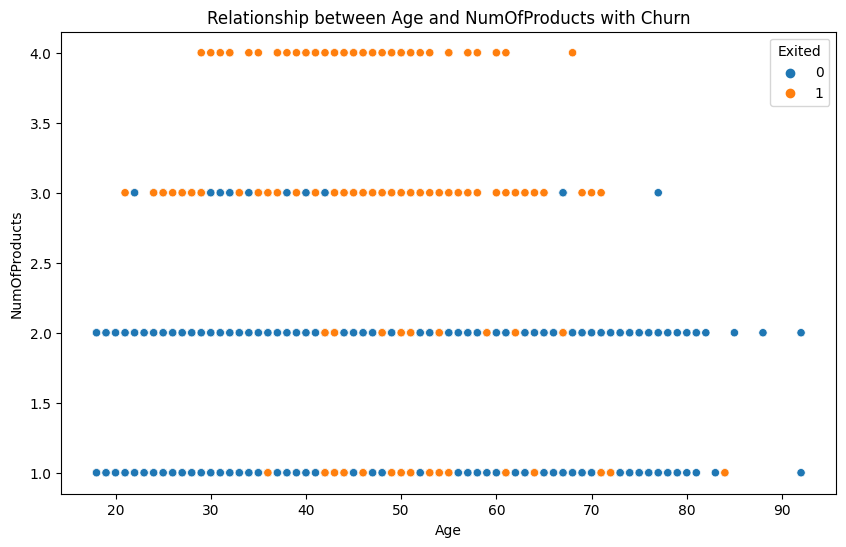

In [35]:
# Explore the relationship between 'Age' and 'NumOfProducts'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='NumOfProducts', hue='Exited', data=df)
plt.title('Relationship between Age and NumOfProducts with Churn')
plt.show()

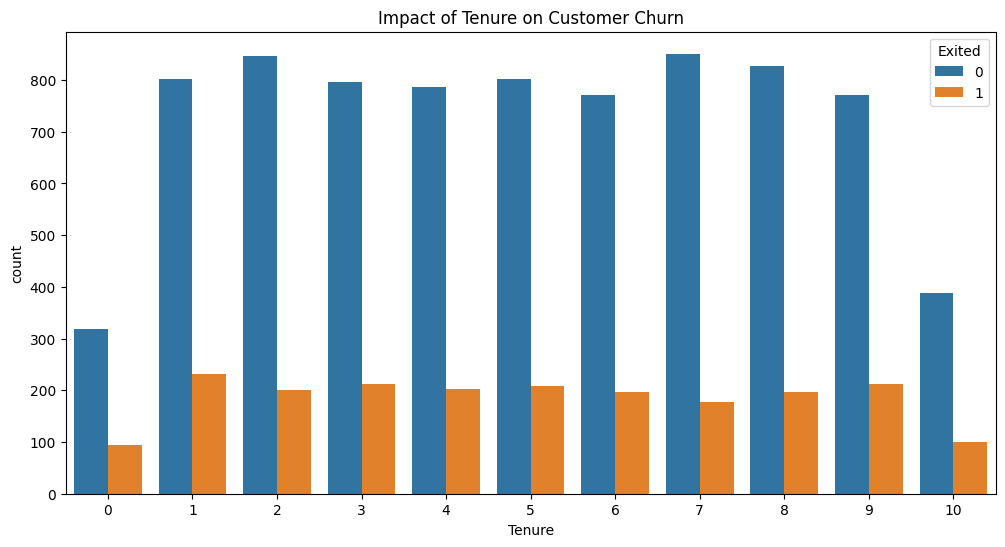

In [36]:
# Explore the impact of 'Tenure' on customer churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Impact of Tenure on Customer Churn')
plt.show()

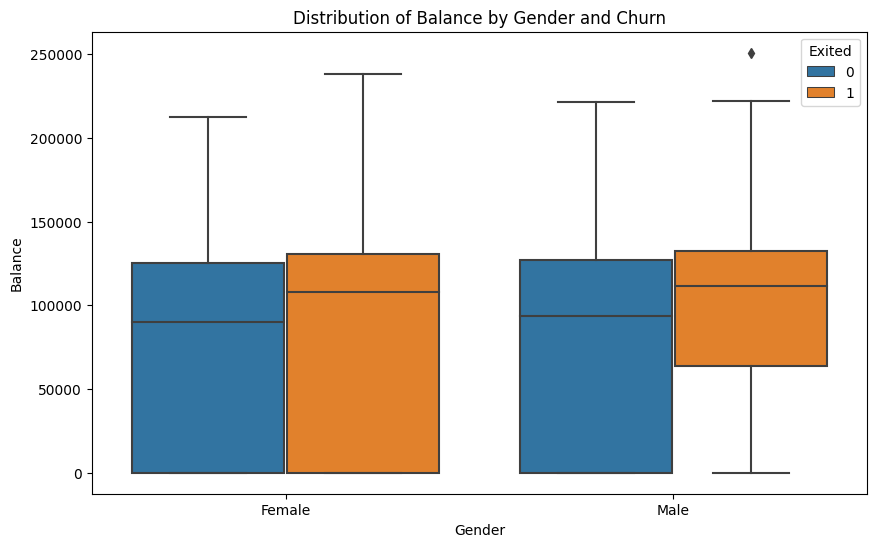

In [37]:
# Explore the distribution of 'Balance' by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Balance', data=df, hue='Exited')
plt.title('Distribution of Balance by Gender and Churn')
plt.show()

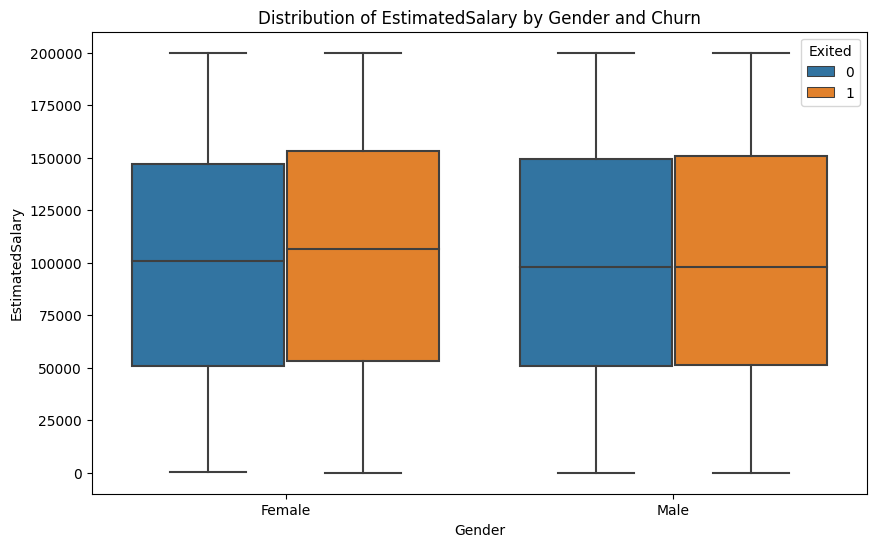

In [38]:
# Explore the distribution of 'EstimatedSalary' by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df, hue='Exited')
plt.title('Distribution of EstimatedSalary by Gender and Churn')
plt.show()

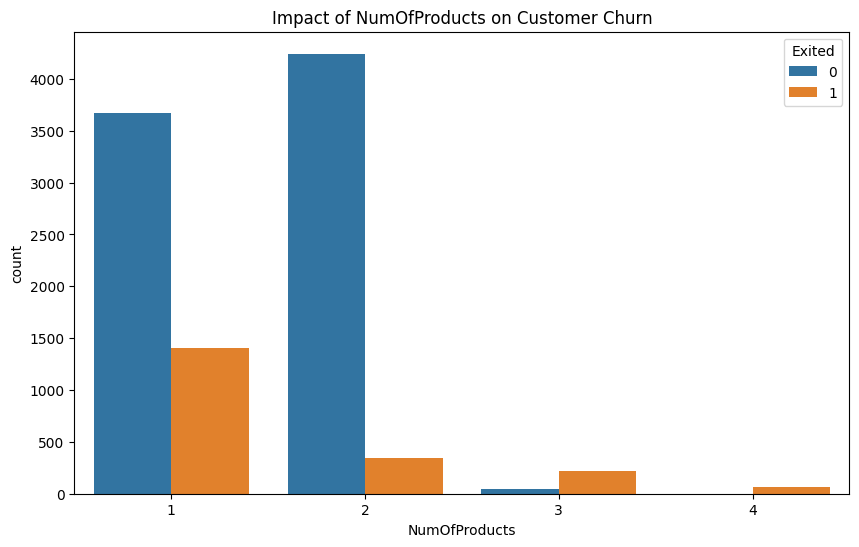

In [39]:
# Explore the impact of 'NumOfProducts' on customer churn
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Impact of NumOfProducts on Customer Churn')
plt.show()

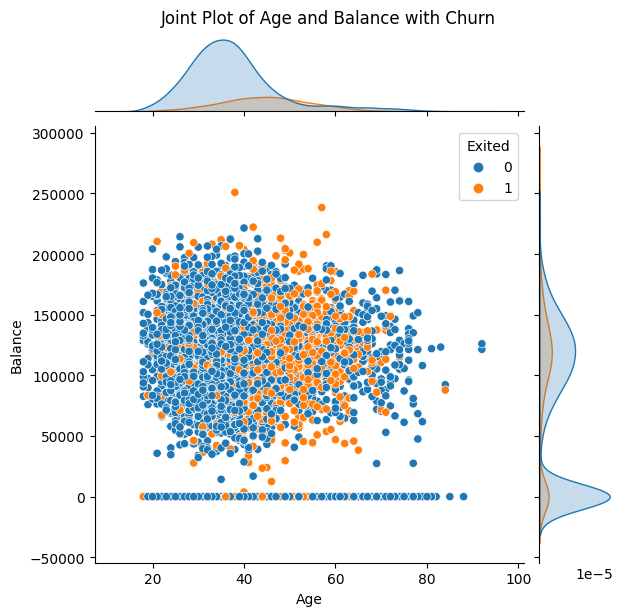

In [40]:
#  Explore the distribution of 'Age' and 'Balance' using a joint plot
sns.jointplot(x='Age', y='Balance', data=df, hue='Exited', kind='scatter')
plt.suptitle('Joint Plot of Age and Balance with Churn', y=1.02)
plt.show()

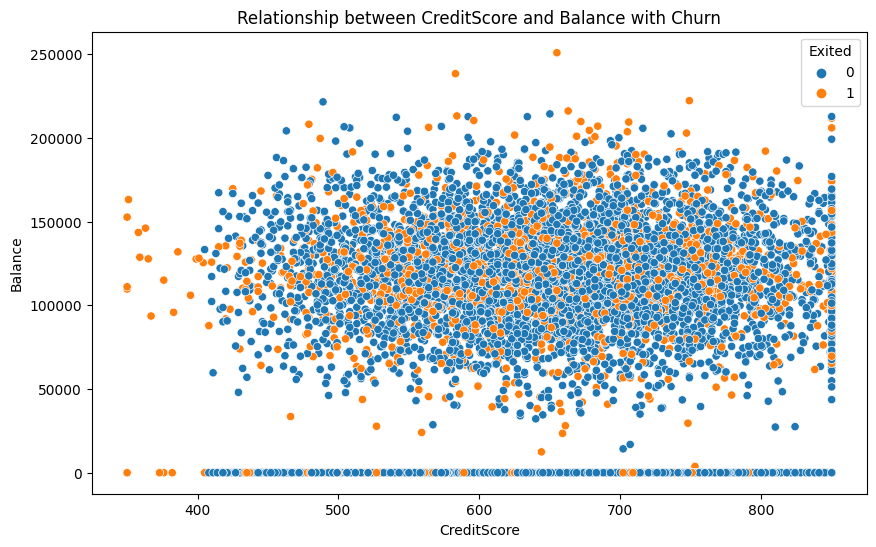

In [41]:
# Explore the relationship between 'CreditScore' and 'Balance' with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='Balance', data=df, hue='Exited')
plt.title('Relationship between CreditScore and Balance with Churn')
plt.show()

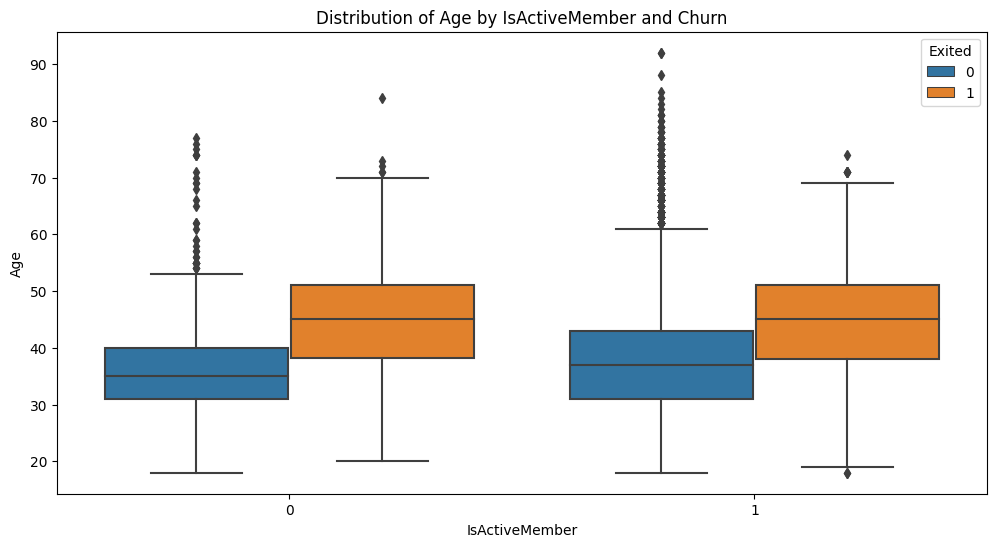

In [42]:
# Explore the distribution of 'Age' by 'IsActiveMember'
plt.figure(figsize=(12, 6))
sns.boxplot(x='IsActiveMember', y='Age', data=df, hue='Exited')
plt.title('Distribution of Age by IsActiveMember and Churn')
plt.show()

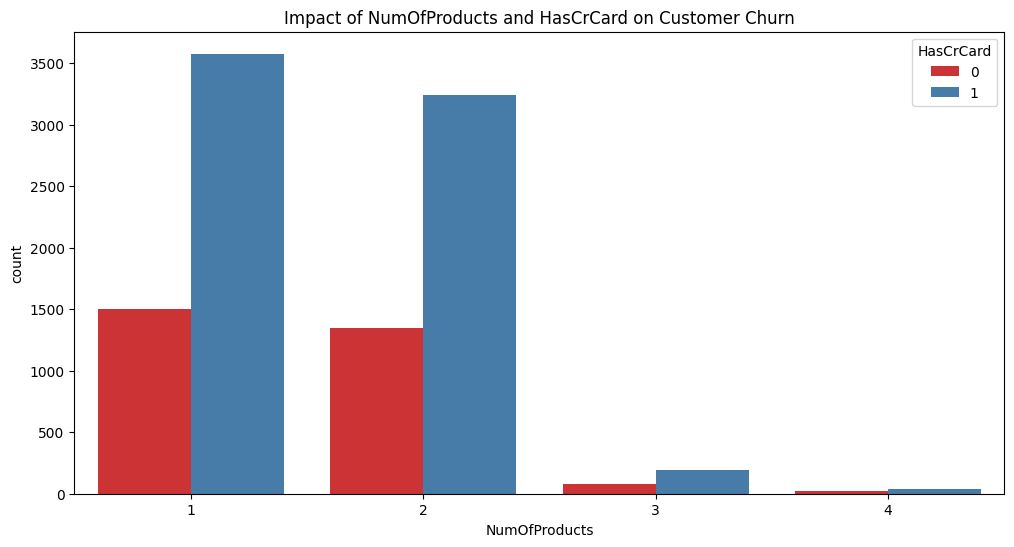

In [43]:
# Explore the impact of 'NumOfProducts' and 'HasCrCard' on customer churn
plt.figure(figsize=(12, 6))
sns.countplot(x='NumOfProducts', hue='HasCrCard', data=df, palette='Set1', hue_order=[0, 1], dodge=True)
plt.title('Impact of NumOfProducts and HasCrCard on Customer Churn')
plt.show()

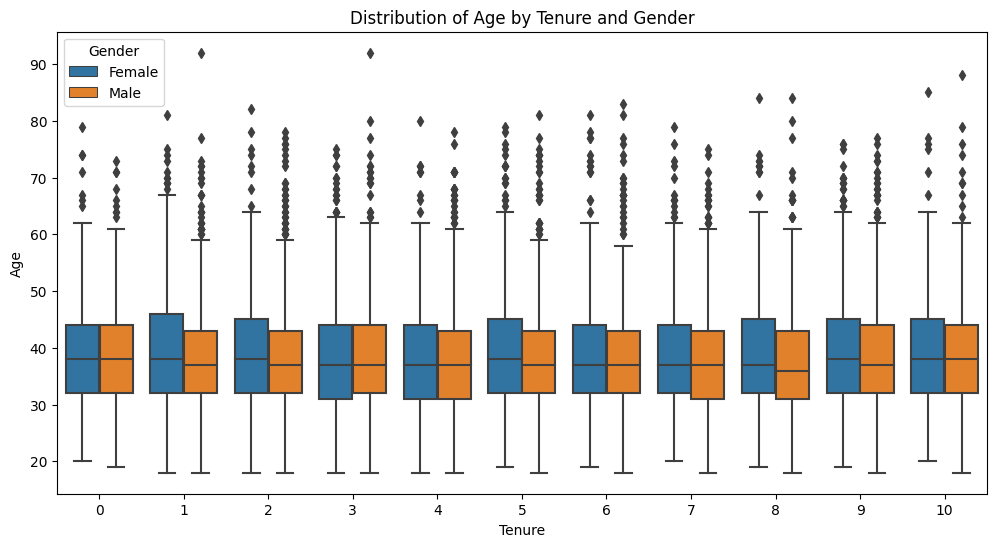

In [44]:
# Explore the distribution of 'Tenure' by 'Gender'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tenure', y='Age', data=df, hue='Gender')
plt.title('Distribution of Age by Tenure and Gender')
plt.show()

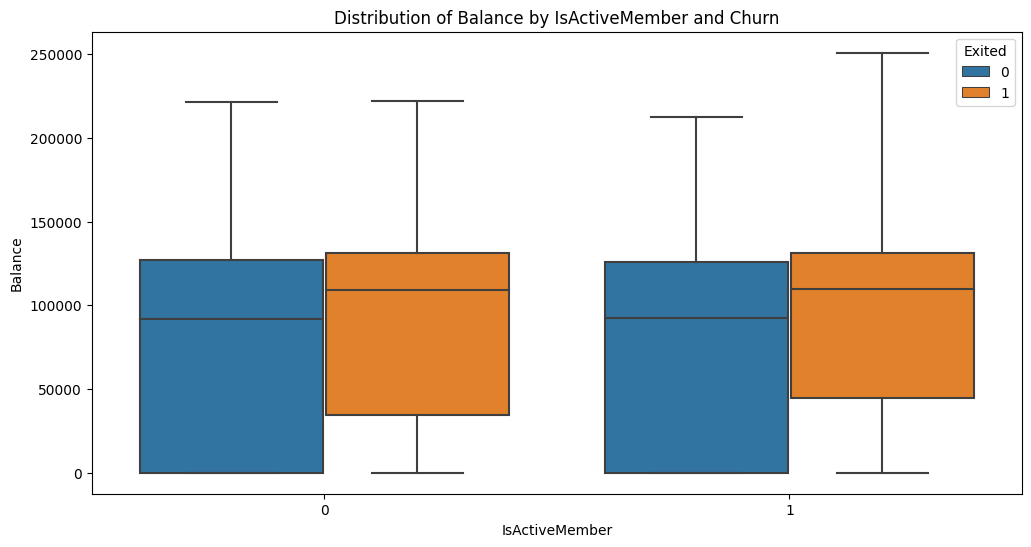

In [45]:
# Explore the distribution of 'Balance' by 'IsActiveMember'
plt.figure(figsize=(12, 6))
sns.boxplot(x='IsActiveMember', y='Balance', data=df, hue='Exited')
plt.title('Distribution of Balance by IsActiveMember and Churn')
plt.show()

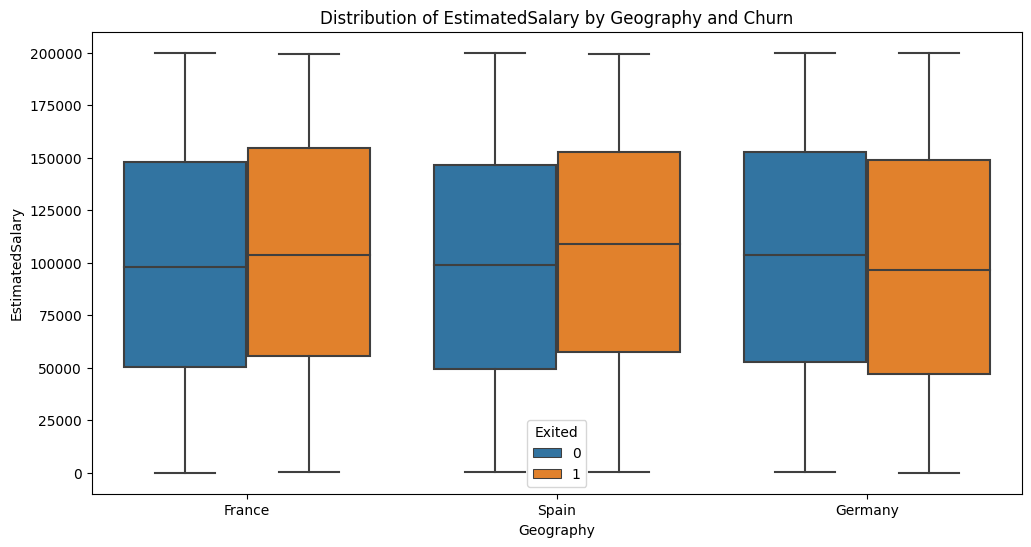

In [46]:
# Explore the distribution of 'EstimatedSalary' by 'Geography'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geography', y='EstimatedSalary', data=df, hue='Exited')
plt.title('Distribution of EstimatedSalary by Geography and Churn')
plt.show()

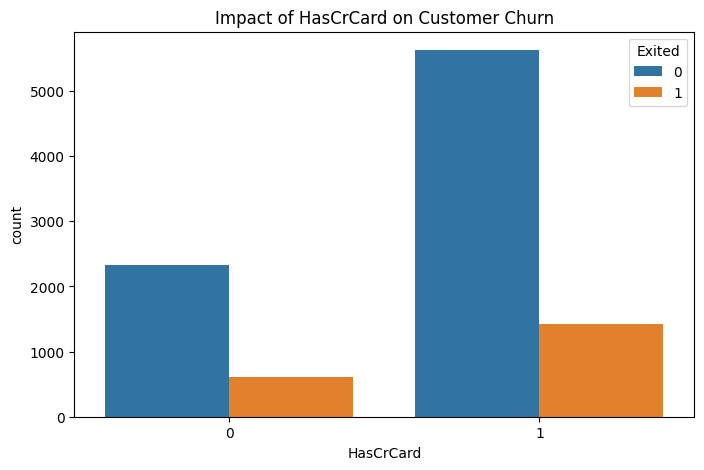

In [47]:
# Explore the impact of 'HasCrCard' on customer churn
plt.figure(figsize=(8, 5))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Impact of HasCrCard on Customer Churn')
plt.show()

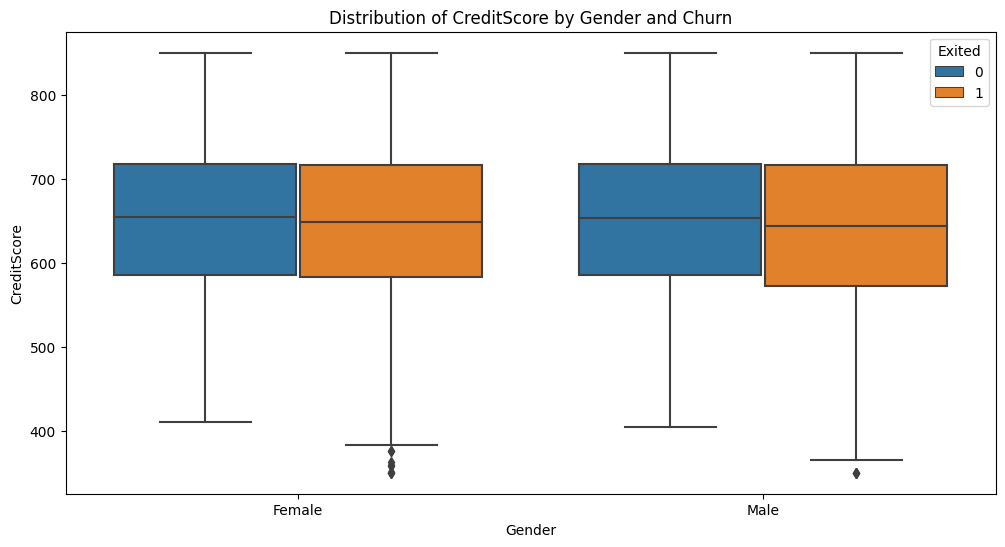

In [48]:
# Explore the distribution of 'CreditScore' by 'Gender'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='CreditScore', data=df, hue='Exited')
plt.title('Distribution of CreditScore by Gender and Churn')
plt.show()

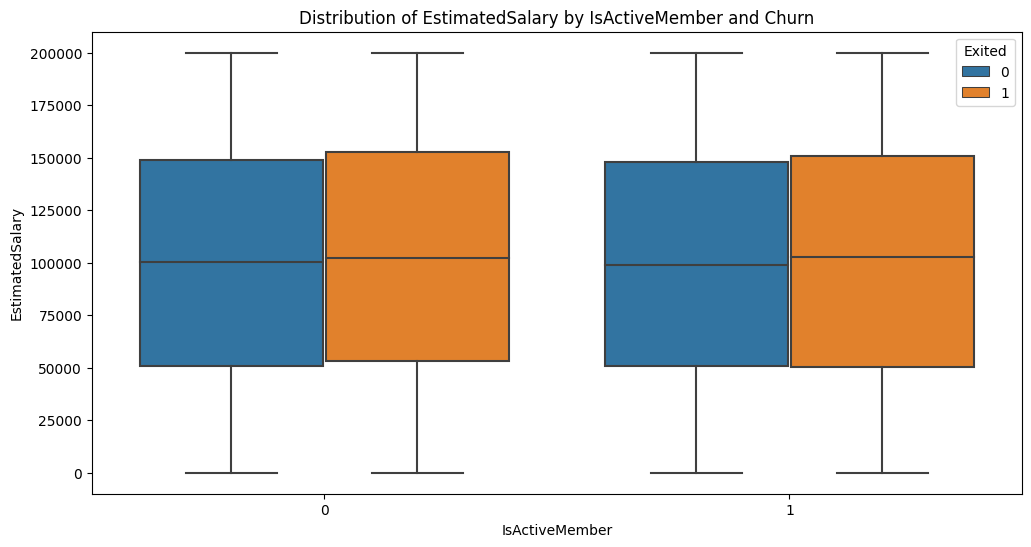

In [49]:
# Explore the distribution of 'EstimatedSalary' by 'IsActiveMember'
plt.figure(figsize=(12, 6))
sns.boxplot(x='IsActiveMember', y='EstimatedSalary', data=df, hue='Exited')
plt.title('Distribution of EstimatedSalary by IsActiveMember and Churn')
plt.show()

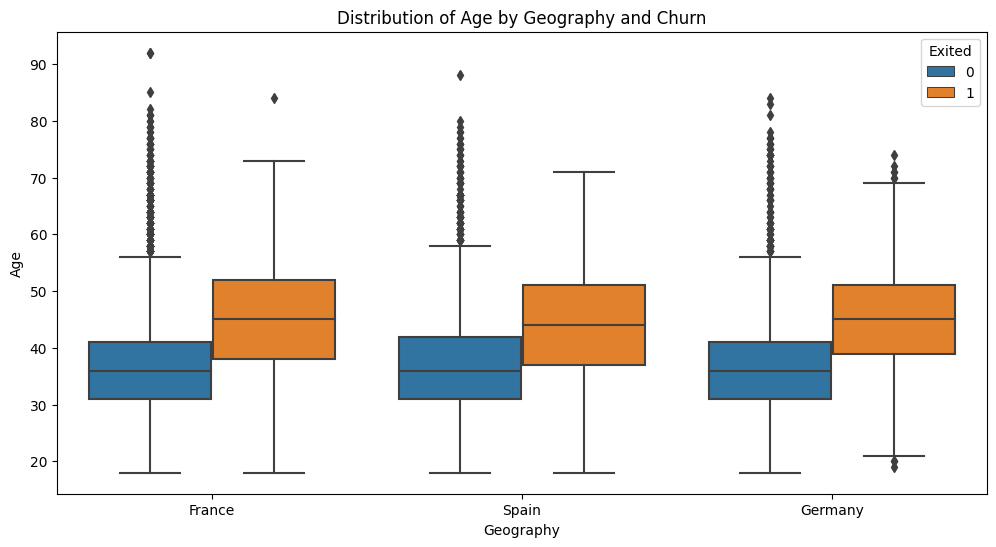

In [50]:
# Explore the distribution of 'Age' by 'Geography' and 'Exited'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geography', y='Age', data=df, hue='Exited')
plt.title('Distribution of Age by Geography and Churn')
plt.show()

In [51]:
# End of EDA 
# Refer Feature Engineering and Model Building Notebook 